### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

### Data Description
The values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Read the dataset
 

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [18]:
data.head(50)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0


2. Investigating the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
for c in data.columns:
    print('****************************************')
    print(f'Value Counts for {c.capitalize()}')
    print('****************************************')
    print(data[c].value_counts().sort_values())
    print('\n')

****************************************
Value Counts for Destination
****************************************
destination
Work               3164
Home               3237
No Urgent Place    6283
Name: count, dtype: int64


****************************************
Value Counts for Passanger
****************************************
passanger
Kid(s)       1006
Partner      1075
Friend(s)    3298
Alone        7305
Name: count, dtype: int64


****************************************
Value Counts for Weather
****************************************
weather
Rainy     1210
Snowy     1405
Sunny    10069
Name: count, dtype: int64


****************************************
Value Counts for Temperature
****************************************
temperature
30    2316
55    3840
80    6528
Name: count, dtype: int64


****************************************
Value Counts for Time
****************************************
time
10PM    2006
2PM     2009
10AM    2275
7AM     3164
6PM     3230
Name: count,

In [8]:
# 1. Check for missing values
missing_values = data.isnull().sum()

# 2. Check data types
data_types = data.dtypes

# 3. Check categorical variables
categorical_variables = data.select_dtypes(include=['object']).columns

# 4. Summary statistics for numeric variables
numeric_summary = data.describe()

# 5. Check inconsistencies
# Example: Check for contradictory values in related columns
inconsistencies = data[(data['direction_same'] == 1) & (data['direction_opp'] == 1)]

# Print the results
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)
print("\nCategorical Variables:\n", categorical_variables)
print("\nNumeric Summary:\n", numeric_summary)
print("\nInconsistencies:\n", inconsistencies)

Missing Values:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Data Types:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon               

3. Handle columns with missing data -- drop, replace, other...

In [20]:
#Handle missing values in the specified columns
data['car'].fillna('Does not have car', inplace=True)
data['Bar'].fillna('Unknown', inplace=True)
data['CoffeeHouse'].fillna('Unknown', inplace=True)
data['CarryAway'].fillna('Unknown', inplace=True)
data['RestaurantLessThan20'].fillna('Unknown', inplace=True)
data['Restaurant20To50'].fillna('Unknown', inplace=True)

# Check updated value counts for 'car' column
print(data['car'].value_counts())

# Check updated value counts for specified columns
columns_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in columns_to_fill:
    print(f"Value Counts for {column}:\n{data[column].value_counts()}\n")


car
Does not have car                           12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64
Value Counts for Bar:
Bar
never      5197
less1      3482
1~3        2473
4~8        1076
gt8         349
Unknown     107
Name: count, dtype: int64

Value Counts for CoffeeHouse:
CoffeeHouse
less1      3385
1~3        3225
never      2962
4~8        1784
gt8        1111
Unknown     217
Name: count, dtype: int64

Value Counts for CarryAway:
CarryAway
1~3        4672
4~8        4258
less1      1856
gt8        1594
never       153
Unknown     151
Name: count, dtype: int64

Value Counts for RestaurantLessThan20:
RestaurantLessThan20
1~3        5376
4~8        3580
less1      2093
gt8        1285
never       220
Unknown     130
Name: count, dtype: int64

Value Counts

4. What proportion of the total observations chose to accept the coupon? 



In [22]:
accepted_coupon_count = data['Y'].sum()
total_observations = len(data)

proportion_accepted_coupon = accepted_coupon_count / total_observations

print(f"Proportion of observations that accepted the coupon: {proportion_accepted_coupon:.2%}")


Proportion of observations that accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

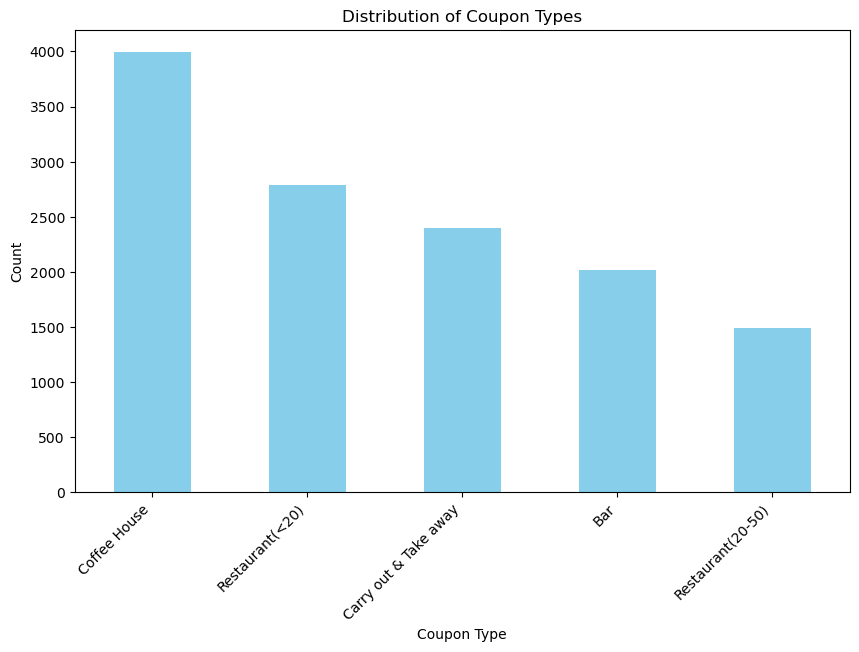

In [23]:
# Count the occurrences of each unique value in the 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


6. Use a histogram to visualize the temperature column.

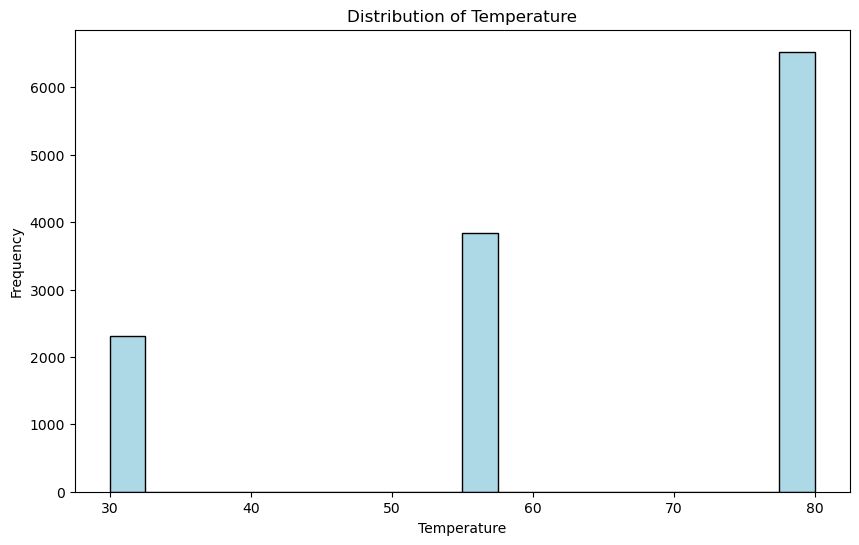

In [24]:
# Plot the histogram to visualize the temprature column
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [26]:
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [27]:
accepted_bar_coupons = bar_coupons_df[bar_coupons_df['Y'] == 1]
proportion_accepted_bar_coupons = len(accepted_bar_coupons) / len(bar_coupons_df)

print("Proportion of Bar Coupons Accepted:", proportion_accepted_bar_coupons)

Proportion of Bar Coupons Accepted: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [28]:
# Create a new DataFrame for customers who went to a bar 3 or fewer times
less_than_3_bars_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['less1', '1~3'])]

# Create a new DataFrame for customers who went to a bar more than 3 times
more_than_3_bars_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates for each group
acceptance_rate_less_than_3_bars = less_than_3_bars_df['Y'].mean()
acceptance_rate_more_than_3_bars = more_than_3_bars_df['Y'].mean()

print("Acceptance Rate for Customers who went to a bar 3 or fewer times:", acceptance_rate_less_than_3_bars)
print("Acceptance Rate for Customers who went to a bar more than 3 times:", acceptance_rate_more_than_3_bars)


Acceptance Rate for Customers who went to a bar 3 or fewer times: 0.5274043433298863
Acceptance Rate for Customers who went to a bar more than 3 times: 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [30]:
# Create a list of ages over 25
ages_over_25 = ['26', '31', '36', '41', '46', '50plus']

# Filter the DataFrame for customers who go to a bar more than once a month and are over 25
bar_frequent_adults_df = bar_coupons_df[(bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'].isin(ages_over_25))]

# Filter the DataFrame for customers who do not meet the above criteria
bar_other_customers_df = bar_coupons_df[~((bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'].isin(ages_over_25)))]

# Calculate acceptance rates for each group
acceptance_rate_frequent_adults = bar_frequent_adults_df['Y'].mean()
acceptance_rate_other_customers = bar_other_customers_df['Y'].mean()

# Display the results
print("Acceptance Rate for Customers who go to a bar more than once a month and are over 25:", acceptance_rate_frequent_adults)
print("Acceptance Rate for All Other Customers:", acceptance_rate_other_customers)


Acceptance Rate for Customers who go to a bar more than once a month and are over 25: 0.6952380952380952
Acceptance Rate for All Other Customers: 0.33500313087038197


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [31]:
# Filter the DataFrame for customers who go to a bar more than once a month
bar_frequent_customers_df = bar_coupons_df[bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Filter the DataFrame for customers with passengers that were not a kid and had occupations other than farming, fishing, or forestry
bar_target_customers_df = bar_frequent_customers_df[~((bar_frequent_customers_df['passanger'] == 'Kid(s)') | (bar_frequent_customers_df['occupation'].isin(['Farming Fishing & Forestry'])) )]

# Filter the DataFrame for customers who do not meet the above criteria
bar_other_customers_df = bar_frequent_customers_df[~bar_frequent_customers_df.index.isin(bar_target_customers_df.index)]

# Calculate acceptance rates for each group
acceptance_rate_target_customers = bar_target_customers_df['Y'].mean()
acceptance_rate_other_customers = bar_other_customers_df['Y'].mean()

# Display the results
print("Acceptance Rate for Customers with specific passenger and occupation criteria:", acceptance_rate_target_customers)
print("Acceptance Rate for All Other Customers:", acceptance_rate_other_customers)


Acceptance Rate for Customers with specific passenger and occupation criteria: 0.7132486388384754
Acceptance Rate for All Other Customers: 0.37777777777777777


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [32]:
# Criteria 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
criteria_1_df = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (~((bar_coupons_df['passanger'] == 'Kid(s)') | (bar_coupons_df['maritalStatus'] == 'Widowed')))
]

# Criteria 2: Go to bars more than once a month and are under the age of 30
criteria_2_df = bar_coupons_df[
    (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons_df['age'].isin(['below21', '26']))
]

# Criteria 3: Go to cheap restaurants more than 4 times a month and income is less than 50K
criteria_3_df = bar_coupons_df[
    (bar_coupons_df['RestaurantLessThan20'] == 'less1') &
    (bar_coupons_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))
]

# Concatenate the DataFrames to get the overall filtered DataFrame
filtered_df = pd.concat([criteria_1_df, criteria_2_df, criteria_3_df])

# Calculate the acceptance rate for the overall filtered DataFrame
acceptance_rate_filtered = filtered_df['Y'].mean()

# Display the results
print("Acceptance Rate for Drivers who meet the specified criteria:", acceptance_rate_filtered)

Acceptance Rate for Drivers who meet the specified criteria: 0.6549062844542448


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
## Frequency of Visiting Bars: Drivers who go to bars more frequently (more than once a month) are more likely to accept bar coupons.

## Demographic Factors: Acceptance rates may vary based on demographic factors such as age. Younger drivers (age below 30) going to bars more frequently may have a higher acceptance rate.

## Passenger Type: Drivers who have passengers other than kids are more likely to accept bar coupons.

## Marital Status: Drivers who are not widowed are more likely to accept bar coupons.

## Income and Restaurant Preferences: Drivers with lower income (less than 50K) who visit cheap restaurants more frequently are more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Proportion of accepted Coffee House coupons: 49.92%


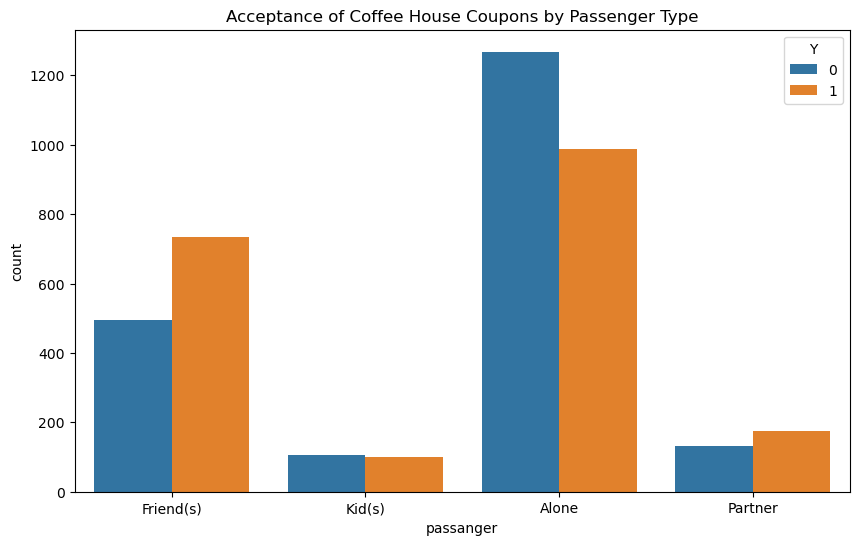

In [34]:
#Passengers who accepts coffee house coupons

coffee_coupons_df = data[data['coupon'] == 'Coffee House'].copy()
accepted_proportion_coffee = coffee_coupons_df['Y'].mean()
print(f"Proportion of accepted Coffee House coupons: {accepted_proportion_coffee:.2%}")

## Visualize the characteristics of passengers who accept Coffee House coupons and Passenger Type
plt.figure(figsize=(10, 6))
sns.countplot(x='passanger', hue='Y', data=coffee_coupons_df)
plt.title('Acceptance of Coffee House Coupons by Passenger Type')
plt.show()

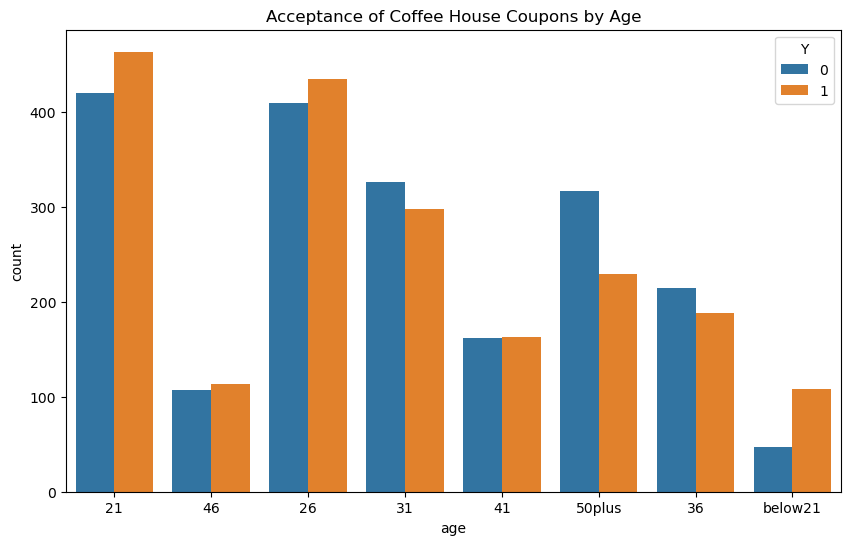

In [36]:
# Visualize the characteristics of passengers who accept Coffee House coupons and Age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='Y', data=coffee_coupons_df)
plt.title('Acceptance of Coffee House Coupons by Age')
plt.show()

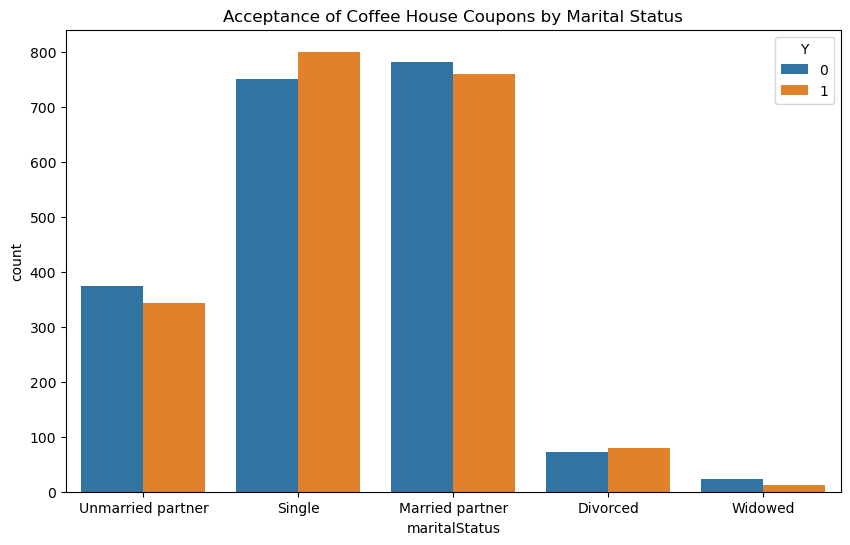

In [37]:
# Visualize the characteristics of passengers who accept Coffee House coupons and Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='maritalStatus', hue='Y', data=coffee_coupons_df)
plt.title('Acceptance of Coffee House Coupons by Marital Status')
plt.show()

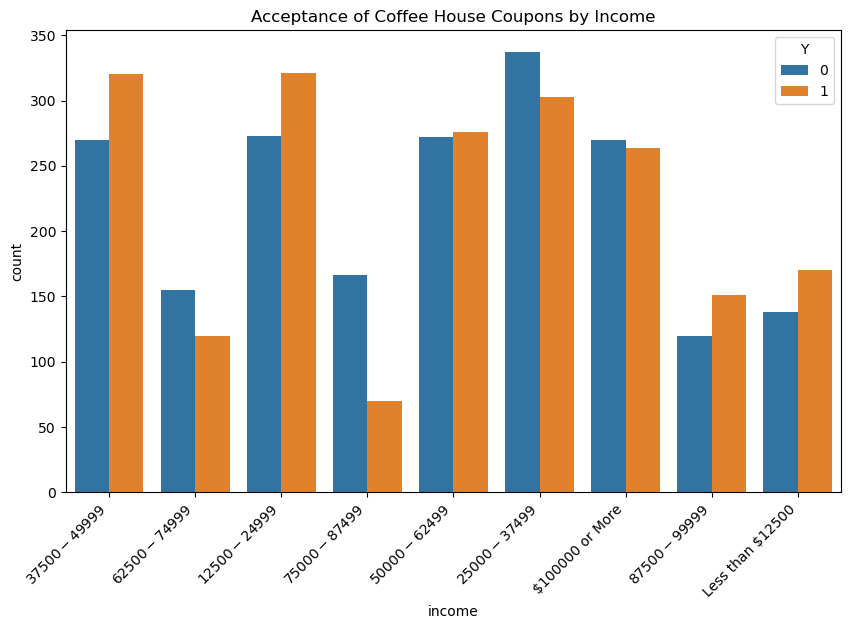

In [40]:
# Visualize the characteristics of passengers who accept Coffee House coupons and Income
plt.figure(figsize=(10, 6))
sns.countplot(x='income', hue='Y', data=coffee_coupons_df)
plt.xticks(rotation=45, ha='right')
plt.title('Acceptance of Coffee House Coupons by Income')
plt.show()